In [33]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import pickle
import os
import time

import seaborn as sns
sns.set()
from matplotlib import style
style.use('ggplot')

In [2]:
with open('data/sp500tickers.pickle', 'rb') as f:
    sp500_tickers = pickle.load(f)

ft_df = pd.read_csv('./data/historical_stocks.csv')
ft_df = ft_df.drop(columns=['name'])

nan_df = ft_df[ft_df.isnull().any(axis=1)]
# temp_df[[temp_df.ticker in sp500_tickers]]
nan_tickers = []
for ticker in nan_df.ticker:
    if ticker in sp500_tickers:
        nan_tickers.append(ticker)

tickers = []
for ticker in sp500_tickers:
    if ticker in ft_df.ticker.unique() and ticker not in nan_tickers:
        tickers.append(ticker)   
tickers = sorted(tickers)
print(len(tickers), tickers)

492 ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBT', 'BBY', 'BDX', 'BEN', 'BHGE', 'BIIB', 'BK', 'BKNG', 'BLK', 'BLL', 'BMY', 'BR', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CELG', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CPRT', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR', '

In [34]:
from pandas_datareader import data as pdr
# import yfinance as yf
# yf.pdr_override() # <== that's all it takes :-)
import ta

sd=dt.datetime(2010, 1, 1)
ed=dt.datetime.now()

def save_yahoo_data(tikers, sd, ed):
    tic = time.time()
    for i, ticker in enumerate(tickers):
        if not os.path.exists('data/stock_dfs'):
            os.mkdir('data/stock_dfs')
        try:
            df = pdr.DataReader(ticker, 'yahoo', sd, ed)
#             df = df / df.iloc[0]          
#             df = ta.add_all_ta_features(df, open='Open', high='High', low='Low', close='Close', volume='Volume')
            df.to_csv('data/stock_dfs/{}.csv'.format(ticker))
        except Exception as e:
            print('------', ticker, e)
        print('%d: %s, elapsed: %.2f sec'%(i, ticker, time.time()-tic))

/home/wangxing/.anaconda3/envs/fastai/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [35]:
cols = [#'Date', 
       'Adj Close', # 'High', 'Low', 'Open', 'Close', 'Volume',
       'volume_obv',  'volume_fi', 
       'volatility_bbm', 'volatility_bbw', 'volatility_bbhi', 'volatility_bbli',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_psar_up_indicator', 'trend_psar_down_indicator',
#        'momentum_stoch', 'momentum_stoch_signal', 
    'momentum_ao', 'momentum_roc', 'others_dr']

In [30]:
save_yahoo_data(tickers, sd=sd, ed=ed)
# save_yahoo_data(['SPY'], sd=sd, ed=ed)

0: A, elapsed: 0.73 sec
1: AAL, elapsed: 1.19 sec
2: AAP, elapsed: 1.74 sec
3: AAPL, elapsed: 2.37 sec
4: ABBV, elapsed: 2.83 sec
5: ABC, elapsed: 3.38 sec
6: ABMD, elapsed: 3.82 sec
7: ABT, elapsed: 4.41 sec
8: ACN, elapsed: 5.02 sec
9: ADBE, elapsed: 5.63 sec
10: ADI, elapsed: 6.26 sec
11: ADM, elapsed: 6.87 sec
12: ADP, elapsed: 7.59 sec
13: ADS, elapsed: 8.10 sec
14: ADSK, elapsed: 8.67 sec
15: AEE, elapsed: 9.17 sec
16: AEP, elapsed: 9.95 sec
17: AES, elapsed: 10.54 sec
18: AFL, elapsed: 11.17 sec
19: AGN, elapsed: 11.78 sec
20: AIG, elapsed: 12.42 sec
21: AIV, elapsed: 13.02 sec
22: AIZ, elapsed: 13.63 sec
23: AJG, elapsed: 14.17 sec
24: AKAM, elapsed: 14.74 sec
25: ALB, elapsed: 15.42 sec
26: ALGN, elapsed: 15.97 sec
27: ALK, elapsed: 16.60 sec
28: ALL, elapsed: 17.08 sec
29: ALLE, elapsed: 17.59 sec
30: ALXN, elapsed: 18.05 sec
31: AMAT, elapsed: 18.65 sec
32: AMD, elapsed: 19.12 sec
33: AME, elapsed: 19.67 sec
34: AMG, elapsed: 20.28 sec
35: AMGN, elapsed: 20.90 sec
36: AMP, e

275: LH, elapsed: 166.39 sec
276: LKQ, elapsed: 166.92 sec
277: LLY, elapsed: 167.62 sec
278: LMT, elapsed: 168.20 sec
279: LNC, elapsed: 168.77 sec
280: LNT, elapsed: 169.36 sec
281: LOW, elapsed: 170.10 sec
282: LRCX, elapsed: 170.81 sec
283: LUV, elapsed: 171.46 sec
284: LW, elapsed: 171.88 sec
285: LYB, elapsed: 172.45 sec
286: M, elapsed: 173.10 sec
287: MA, elapsed: 173.68 sec
288: MAA, elapsed: 174.27 sec
289: MAC, elapsed: 174.80 sec
290: MAR, elapsed: 175.27 sec
291: MAS, elapsed: 175.94 sec
292: MCD, elapsed: 176.47 sec
293: MCHP, elapsed: 177.06 sec
294: MCK, elapsed: 177.70 sec
295: MCO, elapsed: 178.31 sec
296: MDLZ, elapsed: 178.83 sec
297: MDT, elapsed: 179.38 sec
298: MET, elapsed: 179.97 sec
299: MGM, elapsed: 180.56 sec
300: MHK, elapsed: 181.06 sec
301: MKC, elapsed: 181.69 sec
302: MKTX, elapsed: 182.22 sec
303: MLM, elapsed: 182.92 sec
304: MMC, elapsed: 183.51 sec
305: MMM, elapsed: 184.13 sec
306: MNST, elapsed: 184.61 sec
307: MO, elapsed: 185.57 sec
308: MOS, e

In [7]:
# results = pd.DataFrame()
# results['Date'] = pd.date_range(sd, ed, freq='D')
# results.info()

dates = pd.date_range(sd, ed, freq='D')
df = pd.read_csv('data/stock_dfs/AIG.csv', index_col='Date',
                parse_dates=True, na_values=['nan'])
df = pd.DataFrame(index=dates).join(df)
df = df.dropna(subset=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])
df = ta.add_all_ta_features(df, open='Open', high='High', low='Low', close='Close', volume='Volume')
df = df[cols]
df.rename(columns={'others_dr': 'Return'}, inplace=True)
df['target_return'] = df['Return'].shift(-1)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
# df

df[df.isnull().any(axis=1)]

# # df.join(results, on='Date')
# df['Date'] = pd.to_datetime(df['Date'])
# pd.merge(results, df, how='left', on='Date')
# # df.fillna(method='ffill', inplace=True)
# # df.fillna(method='bfill', inplace=True)

# # #             df = df / df.iloc[0]          
# # df = ta.add_all_ta_features(df, open='Open', high='High', low='Low', close='Close', volume='Volume')

# # df.rename(columns={'others_dr': 'Return'}, inplace=True)
# # df['ticker'] = ticker
# # df['target_return'] = df['Return'].shift(-1)
# # final_tickers.append(ticker)
# results = pd.concat([results, df], ignore_index=True)
# results

,Adj Close,volume_obv,volume_fi,volatility_bbm,volatility_bbw,volatility_bbhi,volatility_bbli,trend_macd,trend_macd_signal,trend_macd_diff,trend_psar_up_indicator,trend_psar_down_indicator,momentum_ao,momentum_roc,Return,target_return


In [134]:
dates = pd.date_range(sd, ed, freq='D')
df = pd.read_csv('data/stock_dfs/AAPL.csv', index_col='Date',
                parse_dates=True, na_values=['nan'])
df = pd.DataFrame(index=dates).join(df)
df = df.dropna(subset=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])
df = df / df.iloc[0]
df = ta.add_all_ta_features(df, open='Open', high='High', low='Low', close='Close', volume='Volume')
# df = df[cols]
df.rename(columns={'others_dr': 'Return'}, inplace=True)
df['target_return'] = df['Return'].shift(-1)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
df = df.drop(df.index[0])
df = df.reset_index()
df.rename(columns={'index': 'Date'}, inplace=True)

# df['momentum_stoch'] = np.clip(df['momentum_stoch'], -50, 150)
# df['momentum_stoch_signal'] = np.clip(df['momentum_stoch_signal'], -100, 100)

df.volume_obv.min(),df.volume_obv.max()
df.momentum_ao.min(), df.momentum_ao.max()
# df[df.isnull().any(axis=1)].shape
# # df.join(results, on='Date')
# df['Date'] = pd.to_datetime(df['Date'])
# pd.merge(results, df, how='left', on='Date')
# # df.fillna(method='ffill', inplace=True)
# # df.fillna(method='bfill', inplace=True)

# # #             df = df / df.iloc[0]          
# # df = ta.add_all_ta_features(df, open='Open', high='High', low='Low', close='Close', volume='Volume')

# # df.rename(columns={'others_dr': 'Return'}, inplace=True)
# # df['ticker'] = ticker
# # df['target_return'] = df['Return'].shift(-1)
# # final_tickers.append(ticker)
# results = pd.concat([results, df], ignore_index=True)
# results

(-0.9752249718737085, 0.9308068438747839)

In [132]:
mu, sigma = df['momentum_stoch'].mean(), df['momentum_stoch'].std()
temp = (df['momentum_stoch'] - mu) / sigma

(array([  3.,   1.,   3.,   3.,  10.,  10.,  12.,   6.,   7.,  29.,  25.,
         55.,  99., 165., 316., 538., 412., 281., 191., 134.,  88.,  56.,
         45.,  22.,   6.,  14.,   5.,   2.,   4.,   5.]),
 array([-0.97522497, -0.91169058, -0.84815618, -0.78462179, -0.7210874 ,
        -0.657553  , -0.59401861, -0.53048421, -0.46694982, -0.40341543,
        -0.33988103, -0.27634664, -0.21281225, -0.14927785, -0.08574346,
        -0.02220906,  0.04132533,  0.10485972,  0.16839412,  0.23192851,
         0.29546291,  0.3589973 ,  0.42253169,  0.48606609,  0.54960048,
         0.61313487,  0.67666927,  0.74020366,  0.80373806,  0.86727245,
         0.93080684]),
 <a list of 30 Patch objects>)

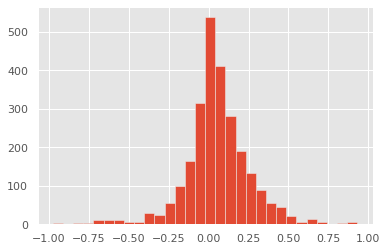

In [135]:
plt.hist(df['momentum_ao'], 30)
# plt.hist(temp, 50)
# np.percentile(df.momentum_stoch, [5, 95])

In [86]:
# df

In [88]:
def compile_data(tickers, cols):
    dates = pd.date_range(sd, ed, freq='D')
    results = pd.DataFrame()
    final_tickers = []
    tic = time.time()
    for i, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('data/stock_dfs/{}.csv'.format(ticker), index_col='Date',
                            parse_dates=True, na_values=['nan'])
            df = pd.DataFrame(index=dates).join(df)
            df = df.dropna(subset=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])
            df = df / df.iloc[0]
            df = ta.add_all_ta_features(df, open='Open', high='High', low='Low', close='Close', volume='Volume')
            df = df[cols]
            df.rename(columns={'others_dr': 'Return'}, inplace=True)
            df['target_return'] = df['Return'].shift(-1)
            df = df.drop(df.index[0])    ## Drop 1st row
            df.fillna(method='ffill', inplace=True)
            df.fillna(method='bfill', inplace=True)
            df['ticker'] = ticker
            
            df = df.reset_index()
            df.rename(columns={'index': 'Date'}, inplace=True)
            
            if df[df.isnull().any(axis=1)].shape[0] > 0:
                print('{} has NAs'.format(ticker))  
#             for v in cols:
#                 if df[v].min() < -100:
#                     print(ticker, v, df[v].min())
#                 if df[v].max() > 100:
#                     print(ticker, v, df[v].max())
            
            final_tickers.append(ticker)
            results = pd.concat([results, df], ignore_index=True)
        except Exception as e:
            print('------', ticker, e)
        print('%d: %s, elapsed: %.2f sec'%(i, ticker, time.time()-tic))
    return final_tickers, results

tickers, df = compile_data(tickers, cols)
print(len(tickers))

In [19]:
# df = df.sort_values(['Date', 'ticker'], ascending=[False, True])
# df_ = df.copy().set_index('Date')
# for d in [5, 20, 63, 252]:
#     roll = df_[['ticker', 'Adj Close']].sort_index().groupby('ticker').rolling(d, min_periods=1).sum()
#     df = df.merge(roll, 'left', ['Date', 'ticker'], suffixes=['', '_sma'+str(d)])

In [20]:
df = pd.merge(df, ft_df, on='ticker')
df.tail()

,Date,Adj Close,volume_obv,volume_fi,volatility_bbm,volatility_bbw,volatility_bbhi,volatility_bbli,trend_macd,trend_macd_signal,trend_macd_diff,trend_psar_up_indicator,trend_psar_down_indicator,momentum_ao,momentum_roc,Return,target_return,ticker,exchange,sector,industry
1197713,2020-02-11,4.902215,5.162887,0.000911,4.474508,0.303992,1.0,0.0,0.069476,0.063701,0.005775,0.0,0.0,0.109473,5.663562,1.038229,-0.729017,ZTS,NYSE,HEALTH CARE,MAJOR PHARMACEUTICALS
1197714,2020-02-12,4.866477,5.135477,0.000648,4.483715,0.322608,0.0,0.0,0.073617,0.065684,0.007933,0.0,0.0,0.128018,5.163275,-0.729017,1.370826,ZTS,NYSE,HEALTH CARE,MAJOR PHARMACEUTICALS
1197715,2020-02-13,4.933188,5.186152,0.001013,4.494034,0.362110,0.0,0.0,0.081065,0.068760,0.012304,0.0,0.0,0.154038,4.831483,1.370826,-0.531257,ZTS,NYSE,HEALTH CARE,MAJOR PHARMACEUTICALS
1197716,2020-02-14,4.906980,5.159044,0.000772,4.501983,0.386456,0.0,0.0,0.083995,0.071807,0.012188,0.0,0.0,0.179533,4.086350,-0.531257,-0.360688,ZTS,NYSE,HEALTH CARE,MAJOR PHARMACEUTICALS
1197717,2020-02-18,4.889281,5.125085,0.000580,4.507610,0.402726,0.0,0.0,0.083996,0.074245,0.009751,0.0,0.0,0.188021,4.071575,-0.360688,-0.360688,ZTS,NYSE,HEALTH CARE,MAJOR PHARMACEUTICALS


In [21]:
def add_datepart(df, field_name='Date', prefix=None, drop=False):
    """Helper function to add columns relevant to date column in df. """
    df[field_name] = pd.to_datetime(df[field_name])
    field = df[field_name]
    attrs = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', \
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    for a in attrs:
        df[a] = getattr(field.dt, a.lower())
    df['Elapsed'] = field.astype(np.int64) // 10 **9
    if drop:
        df.drop(field_name, axis=1, inplace=True)
    return df

In [36]:
add_datepart(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197718 entries, 0 to 1197717
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Date                       1197718 non-null  object  
 1   Adj Close                  1197718 non-null  float64 
 2   volume_obv                 1197718 non-null  float64 
 3   volume_fi                  1197718 non-null  float64 
 4   volatility_bbm             1197718 non-null  float64 
 5   volatility_bbw             1197718 non-null  float64 
 6   volatility_bbhi            1197718 non-null  category
 7   volatility_bbli            1197718 non-null  category
 8   trend_macd                 1197718 non-null  float64 
 9   trend_macd_signal          1197718 non-null  float64 
 10  trend_macd_diff            1197718 non-null  float64 
 11  trend_psar_up_indicator    1197718 non-null  category
 12  trend_psar_down_indicator  1197718 non-null  category
 1

In [23]:
# df.volume_cmf.min(), df.volume_cmf.max()
for ticker in tickers:
    for v in df.columns:
        print(ticker, v, df[v].min(), df[v].max())
# df[df.volume_cmf > 10].shape

A Date 2010-01-05 00:00:00 2020-02-18 00:00:00
A Adj Close 0.1140688187542133 54.83900635373041
A volume_obv -21792.333333333336 24384.027777777785
A volume_fi -225.31909592502996 121.61097529931686
A volatility_bbm 0.10715312735933376 52.73658505074288
A volatility_bbw 0.0 20.88635391441825
A volatility_bbhi 0.0 1.0
A volatility_bbli 0.0 1.0
A trend_macd -2.3672871394718626 2.7264516227585105
A trend_macd_signal -2.048774573781549 2.4884346316949397
A trend_macd_diff -1.1127178441130463 1.2314745541521448
A trend_psar_up_indicator 0.0 1.0
A trend_psar_down_indicator 0.0 1.0
A momentum_ao -6.488795259387565 7.64268674707116
A momentum_roc -59.317783426417236 110.4421033357319
A Return -61.893380629619266 61.90656365324334
A target_return -61.893380629619266 61.90656365324334
A ticker A ZTS
A exchange NASDAQ NYSE
A sector BASIC INDUSTRIES TRANSPORTATION
A industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
A Year 2010 2020
A Month 1 12
A Week 1 53
A Day 1 31
A Dayofweek 0 4
A Dayofyear 2 3

ABMD exchange NASDAQ NYSE
ABMD sector BASIC INDUSTRIES TRANSPORTATION
ABMD industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
ABMD Year 2010 2020
ABMD Month 1 12
ABMD Week 1 53
ABMD Day 1 31
ABMD Dayofweek 0 4
ABMD Dayofyear 2 366
ABMD Is_month_end False True
ABMD Is_month_start False True
ABMD Is_quarter_end False True
ABMD Is_quarter_start False True
ABMD Is_year_end False True
ABMD Is_year_start False False
ABMD Elapsed 1262649600 1581984000
ABT Date 2010-01-05 00:00:00 2020-02-18 00:00:00
ABT Adj Close 0.1140688187542133 54.83900635373041
ABT volume_obv -21792.333333333336 24384.027777777785
ABT volume_fi -225.31909592502996 121.61097529931686
ABT volatility_bbm 0.10715312735933376 52.73658505074288
ABT volatility_bbw 0.0 20.88635391441825
ABT volatility_bbhi 0.0 1.0
ABT volatility_bbli 0.0 1.0
ABT trend_macd -2.3672871394718626 2.7264516227585105
ABT trend_macd_signal -2.048774573781549 2.4884346316949397
ABT trend_macd_diff -1.1127178441130463 1.2314745541521448
ABT trend_psar_up_i

ADS exchange NASDAQ NYSE
ADS sector BASIC INDUSTRIES TRANSPORTATION
ADS industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
ADS Year 2010 2020
ADS Month 1 12
ADS Week 1 53
ADS Day 1 31
ADS Dayofweek 0 4
ADS Dayofyear 2 366
ADS Is_month_end False True
ADS Is_month_start False True
ADS Is_quarter_end False True
ADS Is_quarter_start False True
ADS Is_year_end False True
ADS Is_year_start False False
ADS Elapsed 1262649600 1581984000
ADSK Date 2010-01-05 00:00:00 2020-02-18 00:00:00
ADSK Adj Close 0.1140688187542133 54.83900635373041
ADSK volume_obv -21792.333333333336 24384.027777777785
ADSK volume_fi -225.31909592502996 121.61097529931686
ADSK volatility_bbm 0.10715312735933376 52.73658505074288
ADSK volatility_bbw 0.0 20.88635391441825
ADSK volatility_bbhi 0.0 1.0
ADSK volatility_bbli 0.0 1.0
ADSK trend_macd -2.3672871394718626 2.7264516227585105
ADSK trend_macd_signal -2.048774573781549 2.4884346316949397
ADSK trend_macd_diff -1.1127178441130463 1.2314745541521448
ADSK trend_psar_up_indic

AIG exchange NASDAQ NYSE
AIG sector BASIC INDUSTRIES TRANSPORTATION
AIG industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
AIG Year 2010 2020
AIG Month 1 12
AIG Week 1 53
AIG Day 1 31
AIG Dayofweek 0 4
AIG Dayofyear 2 366
AIG Is_month_end False True
AIG Is_month_start False True
AIG Is_quarter_end False True
AIG Is_quarter_start False True
AIG Is_year_end False True
AIG Is_year_start False False
AIG Elapsed 1262649600 1581984000
AIV Date 2010-01-05 00:00:00 2020-02-18 00:00:00
AIV Adj Close 0.1140688187542133 54.83900635373041
AIV volume_obv -21792.333333333336 24384.027777777785
AIV volume_fi -225.31909592502996 121.61097529931686
AIV volatility_bbm 0.10715312735933376 52.73658505074288
AIV volatility_bbw 0.0 20.88635391441825
AIV volatility_bbhi 0.0 1.0
AIV volatility_bbli 0.0 1.0
AIV trend_macd -2.3672871394718626 2.7264516227585105
AIV trend_macd_signal -2.048774573781549 2.4884346316949397
AIV trend_macd_diff -1.1127178441130463 1.2314745541521448
AIV trend_psar_up_indicator 0.0 1.0

ALK exchange NASDAQ NYSE
ALK sector BASIC INDUSTRIES TRANSPORTATION
ALK industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
ALK Year 2010 2020
ALK Month 1 12
ALK Week 1 53
ALK Day 1 31
ALK Dayofweek 0 4
ALK Dayofyear 2 366
ALK Is_month_end False True
ALK Is_month_start False True
ALK Is_quarter_end False True
ALK Is_quarter_start False True
ALK Is_year_end False True
ALK Is_year_start False False
ALK Elapsed 1262649600 1581984000
ALL Date 2010-01-05 00:00:00 2020-02-18 00:00:00
ALL Adj Close 0.1140688187542133 54.83900635373041
ALL volume_obv -21792.333333333336 24384.027777777785
ALL volume_fi -225.31909592502996 121.61097529931686
ALL volatility_bbm 0.10715312735933376 52.73658505074288
ALL volatility_bbw 0.0 20.88635391441825
ALL volatility_bbhi 0.0 1.0
ALL volatility_bbli 0.0 1.0
ALL trend_macd -2.3672871394718626 2.7264516227585105
ALL trend_macd_signal -2.048774573781549 2.4884346316949397
ALL trend_macd_diff -1.1127178441130463 1.2314745541521448
ALL trend_psar_up_indicator 0.0 1.0

AMG exchange NASDAQ NYSE
AMG sector BASIC INDUSTRIES TRANSPORTATION
AMG industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
AMG Year 2010 2020
AMG Month 1 12
AMG Week 1 53
AMG Day 1 31
AMG Dayofweek 0 4
AMG Dayofyear 2 366
AMG Is_month_end False True
AMG Is_month_start False True
AMG Is_quarter_end False True
AMG Is_quarter_start False True
AMG Is_year_end False True
AMG Is_year_start False False
AMG Elapsed 1262649600 1581984000
AMGN Date 2010-01-05 00:00:00 2020-02-18 00:00:00
AMGN Adj Close 0.1140688187542133 54.83900635373041
AMGN volume_obv -21792.333333333336 24384.027777777785
AMGN volume_fi -225.31909592502996 121.61097529931686
AMGN volatility_bbm 0.10715312735933376 52.73658505074288
AMGN volatility_bbw 0.0 20.88635391441825
AMGN volatility_bbhi 0.0 1.0
AMGN volatility_bbli 0.0 1.0
AMGN trend_macd -2.3672871394718626 2.7264516227585105
AMGN trend_macd_signal -2.048774573781549 2.4884346316949397
AMGN trend_macd_diff -1.1127178441130463 1.2314745541521448
AMGN trend_psar_up_indic

ANTM exchange NASDAQ NYSE
ANTM sector BASIC INDUSTRIES TRANSPORTATION
ANTM industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
ANTM Year 2010 2020
ANTM Month 1 12
ANTM Week 1 53
ANTM Day 1 31
ANTM Dayofweek 0 4
ANTM Dayofyear 2 366
ANTM Is_month_end False True
ANTM Is_month_start False True
ANTM Is_quarter_end False True
ANTM Is_quarter_start False True
ANTM Is_year_end False True
ANTM Is_year_start False False
ANTM Elapsed 1262649600 1581984000
AON Date 2010-01-05 00:00:00 2020-02-18 00:00:00
AON Adj Close 0.1140688187542133 54.83900635373041
AON volume_obv -21792.333333333336 24384.027777777785
AON volume_fi -225.31909592502996 121.61097529931686
AON volatility_bbm 0.10715312735933376 52.73658505074288
AON volatility_bbw 0.0 20.88635391441825
AON volatility_bbhi 0.0 1.0
AON volatility_bbli 0.0 1.0
AON trend_macd -2.3672871394718626 2.7264516227585105
AON trend_macd_signal -2.048774573781549 2.4884346316949397
AON trend_macd_diff -1.1127178441130463 1.2314745541521448
AON trend_psar_up_i

ARE exchange NASDAQ NYSE
ARE sector BASIC INDUSTRIES TRANSPORTATION
ARE industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
ARE Year 2010 2020
ARE Month 1 12
ARE Week 1 53
ARE Day 1 31
ARE Dayofweek 0 4
ARE Dayofyear 2 366
ARE Is_month_end False True
ARE Is_month_start False True
ARE Is_quarter_end False True
ARE Is_quarter_start False True
ARE Is_year_end False True
ARE Is_year_start False False
ARE Elapsed 1262649600 1581984000
ARNC Date 2010-01-05 00:00:00 2020-02-18 00:00:00
ARNC Adj Close 0.1140688187542133 54.83900635373041
ARNC volume_obv -21792.333333333336 24384.027777777785
ARNC volume_fi -225.31909592502996 121.61097529931686
ARNC volatility_bbm 0.10715312735933376 52.73658505074288
ARNC volatility_bbw 0.0 20.88635391441825
ARNC volatility_bbhi 0.0 1.0
ARNC volatility_bbli 0.0 1.0
ARNC trend_macd -2.3672871394718626 2.7264516227585105
ARNC trend_macd_signal -2.048774573781549 2.4884346316949397
ARNC trend_macd_diff -1.1127178441130463 1.2314745541521448
ARNC trend_psar_up_indic

AWK exchange NASDAQ NYSE
AWK sector BASIC INDUSTRIES TRANSPORTATION
AWK industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
AWK Year 2010 2020
AWK Month 1 12
AWK Week 1 53
AWK Day 1 31
AWK Dayofweek 0 4
AWK Dayofyear 2 366
AWK Is_month_end False True
AWK Is_month_start False True
AWK Is_quarter_end False True
AWK Is_quarter_start False True
AWK Is_year_end False True
AWK Is_year_start False False
AWK Elapsed 1262649600 1581984000
AXP Date 2010-01-05 00:00:00 2020-02-18 00:00:00
AXP Adj Close 0.1140688187542133 54.83900635373041
AXP volume_obv -21792.333333333336 24384.027777777785
AXP volume_fi -225.31909592502996 121.61097529931686
AXP volatility_bbm 0.10715312735933376 52.73658505074288
AXP volatility_bbw 0.0 20.88635391441825
AXP volatility_bbhi 0.0 1.0
AXP volatility_bbli 0.0 1.0
AXP trend_macd -2.3672871394718626 2.7264516227585105
AXP trend_macd_signal -2.048774573781549 2.4884346316949397
AXP trend_macd_diff -1.1127178441130463 1.2314745541521448
AXP trend_psar_up_indicator 0.0 1.0

BDX exchange NASDAQ NYSE
BDX sector BASIC INDUSTRIES TRANSPORTATION
BDX industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
BDX Year 2010 2020
BDX Month 1 12
BDX Week 1 53
BDX Day 1 31
BDX Dayofweek 0 4
BDX Dayofyear 2 366
BDX Is_month_end False True
BDX Is_month_start False True
BDX Is_quarter_end False True
BDX Is_quarter_start False True
BDX Is_year_end False True
BDX Is_year_start False False
BDX Elapsed 1262649600 1581984000
BEN Date 2010-01-05 00:00:00 2020-02-18 00:00:00
BEN Adj Close 0.1140688187542133 54.83900635373041
BEN volume_obv -21792.333333333336 24384.027777777785
BEN volume_fi -225.31909592502996 121.61097529931686
BEN volatility_bbm 0.10715312735933376 52.73658505074288
BEN volatility_bbw 0.0 20.88635391441825
BEN volatility_bbhi 0.0 1.0
BEN volatility_bbli 0.0 1.0
BEN trend_macd -2.3672871394718626 2.7264516227585105
BEN trend_macd_signal -2.048774573781549 2.4884346316949397
BEN trend_macd_diff -1.1127178441130463 1.2314745541521448
BEN trend_psar_up_indicator 0.0 1.0

BMY exchange NASDAQ NYSE
BMY sector BASIC INDUSTRIES TRANSPORTATION
BMY industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
BMY Year 2010 2020
BMY Month 1 12
BMY Week 1 53
BMY Day 1 31
BMY Dayofweek 0 4
BMY Dayofyear 2 366
BMY Is_month_end False True
BMY Is_month_start False True
BMY Is_quarter_end False True
BMY Is_quarter_start False True
BMY Is_year_end False True
BMY Is_year_start False False
BMY Elapsed 1262649600 1581984000
BR Date 2010-01-05 00:00:00 2020-02-18 00:00:00
BR Adj Close 0.1140688187542133 54.83900635373041
BR volume_obv -21792.333333333336 24384.027777777785
BR volume_fi -225.31909592502996 121.61097529931686
BR volatility_bbm 0.10715312735933376 52.73658505074288
BR volatility_bbw 0.0 20.88635391441825
BR volatility_bbhi 0.0 1.0
BR volatility_bbli 0.0 1.0
BR trend_macd -2.3672871394718626 2.7264516227585105
BR trend_macd_signal -2.048774573781549 2.4884346316949397
BR trend_macd_diff -1.1127178441130463 1.2314745541521448
BR trend_psar_up_indicator 0.0 1.0
BR trend_ps

CAH exchange NASDAQ NYSE
CAH sector BASIC INDUSTRIES TRANSPORTATION
CAH industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
CAH Year 2010 2020
CAH Month 1 12
CAH Week 1 53
CAH Day 1 31
CAH Dayofweek 0 4
CAH Dayofyear 2 366
CAH Is_month_end False True
CAH Is_month_start False True
CAH Is_quarter_end False True
CAH Is_quarter_start False True
CAH Is_year_end False True
CAH Is_year_start False False
CAH Elapsed 1262649600 1581984000
CAT Date 2010-01-05 00:00:00 2020-02-18 00:00:00
CAT Adj Close 0.1140688187542133 54.83900635373041
CAT volume_obv -21792.333333333336 24384.027777777785
CAT volume_fi -225.31909592502996 121.61097529931686
CAT volatility_bbm 0.10715312735933376 52.73658505074288
CAT volatility_bbw 0.0 20.88635391441825
CAT volatility_bbhi 0.0 1.0
CAT volatility_bbli 0.0 1.0
CAT trend_macd -2.3672871394718626 2.7264516227585105
CAT trend_macd_signal -2.048774573781549 2.4884346316949397
CAT trend_macd_diff -1.1127178441130463 1.2314745541521448
CAT trend_psar_up_indicator 0.0 1.0

CDNS exchange NASDAQ NYSE
CDNS sector BASIC INDUSTRIES TRANSPORTATION
CDNS industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
CDNS Year 2010 2020
CDNS Month 1 12
CDNS Week 1 53
CDNS Day 1 31
CDNS Dayofweek 0 4
CDNS Dayofyear 2 366
CDNS Is_month_end False True
CDNS Is_month_start False True
CDNS Is_quarter_end False True
CDNS Is_quarter_start False True
CDNS Is_year_end False True
CDNS Is_year_start False False
CDNS Elapsed 1262649600 1581984000
CDW Date 2010-01-05 00:00:00 2020-02-18 00:00:00
CDW Adj Close 0.1140688187542133 54.83900635373041
CDW volume_obv -21792.333333333336 24384.027777777785
CDW volume_fi -225.31909592502996 121.61097529931686
CDW volatility_bbm 0.10715312735933376 52.73658505074288
CDW volatility_bbw 0.0 20.88635391441825
CDW volatility_bbhi 0.0 1.0
CDW volatility_bbli 0.0 1.0
CDW trend_macd -2.3672871394718626 2.7264516227585105
CDW trend_macd_signal -2.048774573781549 2.4884346316949397
CDW trend_macd_diff -1.1127178441130463 1.2314745541521448
CDW trend_psar_up_i

CHD exchange NASDAQ NYSE
CHD sector BASIC INDUSTRIES TRANSPORTATION
CHD industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
CHD Year 2010 2020
CHD Month 1 12
CHD Week 1 53
CHD Day 1 31
CHD Dayofweek 0 4
CHD Dayofyear 2 366
CHD Is_month_end False True
CHD Is_month_start False True
CHD Is_quarter_end False True
CHD Is_quarter_start False True
CHD Is_year_end False True
CHD Is_year_start False False
CHD Elapsed 1262649600 1581984000
CHRW Date 2010-01-05 00:00:00 2020-02-18 00:00:00
CHRW Adj Close 0.1140688187542133 54.83900635373041
CHRW volume_obv -21792.333333333336 24384.027777777785
CHRW volume_fi -225.31909592502996 121.61097529931686
CHRW volatility_bbm 0.10715312735933376 52.73658505074288
CHRW volatility_bbw 0.0 20.88635391441825
CHRW volatility_bbhi 0.0 1.0
CHRW volatility_bbli 0.0 1.0
CHRW trend_macd -2.3672871394718626 2.7264516227585105
CHRW trend_macd_signal -2.048774573781549 2.4884346316949397
CHRW trend_macd_diff -1.1127178441130463 1.2314745541521448
CHRW trend_psar_up_indic

CMA exchange NASDAQ NYSE
CMA sector BASIC INDUSTRIES TRANSPORTATION
CMA industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
CMA Year 2010 2020
CMA Month 1 12
CMA Week 1 53
CMA Day 1 31
CMA Dayofweek 0 4
CMA Dayofyear 2 366
CMA Is_month_end False True
CMA Is_month_start False True
CMA Is_quarter_end False True
CMA Is_quarter_start False True
CMA Is_year_end False True
CMA Is_year_start False False
CMA Elapsed 1262649600 1581984000
CMCSA Date 2010-01-05 00:00:00 2020-02-18 00:00:00
CMCSA Adj Close 0.1140688187542133 54.83900635373041
CMCSA volume_obv -21792.333333333336 24384.027777777785
CMCSA volume_fi -225.31909592502996 121.61097529931686
CMCSA volatility_bbm 0.10715312735933376 52.73658505074288
CMCSA volatility_bbw 0.0 20.88635391441825
CMCSA volatility_bbhi 0.0 1.0
CMCSA volatility_bbli 0.0 1.0
CMCSA trend_macd -2.3672871394718626 2.7264516227585105
CMCSA trend_macd_signal -2.048774573781549 2.4884346316949397
CMCSA trend_macd_diff -1.1127178441130463 1.2314745541521448
CMCSA trend_p

CNP exchange NASDAQ NYSE
CNP sector BASIC INDUSTRIES TRANSPORTATION
CNP industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
CNP Year 2010 2020
CNP Month 1 12
CNP Week 1 53
CNP Day 1 31
CNP Dayofweek 0 4
CNP Dayofyear 2 366
CNP Is_month_end False True
CNP Is_month_start False True
CNP Is_quarter_end False True
CNP Is_quarter_start False True
CNP Is_year_end False True
CNP Is_year_start False False
CNP Elapsed 1262649600 1581984000
COF Date 2010-01-05 00:00:00 2020-02-18 00:00:00
COF Adj Close 0.1140688187542133 54.83900635373041
COF volume_obv -21792.333333333336 24384.027777777785
COF volume_fi -225.31909592502996 121.61097529931686
COF volatility_bbm 0.10715312735933376 52.73658505074288
COF volatility_bbw 0.0 20.88635391441825
COF volatility_bbhi 0.0 1.0
COF volatility_bbli 0.0 1.0
COF trend_macd -2.3672871394718626 2.7264516227585105
COF trend_macd_signal -2.048774573781549 2.4884346316949397
COF trend_macd_diff -1.1127178441130463 1.2314745541521448
COF trend_psar_up_indicator 0.0 1.0

CPB exchange NASDAQ NYSE
CPB sector BASIC INDUSTRIES TRANSPORTATION
CPB industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
CPB Year 2010 2020
CPB Month 1 12
CPB Week 1 53
CPB Day 1 31
CPB Dayofweek 0 4
CPB Dayofyear 2 366
CPB Is_month_end False True
CPB Is_month_start False True
CPB Is_quarter_end False True
CPB Is_quarter_start False True
CPB Is_year_end False True
CPB Is_year_start False False
CPB Elapsed 1262649600 1581984000
CPRT Date 2010-01-05 00:00:00 2020-02-18 00:00:00
CPRT Adj Close 0.1140688187542133 54.83900635373041
CPRT volume_obv -21792.333333333336 24384.027777777785
CPRT volume_fi -225.31909592502996 121.61097529931686
CPRT volatility_bbm 0.10715312735933376 52.73658505074288
CPRT volatility_bbw 0.0 20.88635391441825
CPRT volatility_bbhi 0.0 1.0
CPRT volatility_bbli 0.0 1.0
CPRT trend_macd -2.3672871394718626 2.7264516227585105
CPRT trend_macd_signal -2.048774573781549 2.4884346316949397
CPRT trend_macd_diff -1.1127178441130463 1.2314745541521448
CPRT trend_psar_up_indic

CTSH exchange NASDAQ NYSE
CTSH sector BASIC INDUSTRIES TRANSPORTATION
CTSH industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
CTSH Year 2010 2020
CTSH Month 1 12
CTSH Week 1 53
CTSH Day 1 31
CTSH Dayofweek 0 4
CTSH Dayofyear 2 366
CTSH Is_month_end False True
CTSH Is_month_start False True
CTSH Is_quarter_end False True
CTSH Is_quarter_start False True
CTSH Is_year_end False True
CTSH Is_year_start False False
CTSH Elapsed 1262649600 1581984000
CTXS Date 2010-01-05 00:00:00 2020-02-18 00:00:00
CTXS Adj Close 0.1140688187542133 54.83900635373041
CTXS volume_obv -21792.333333333336 24384.027777777785
CTXS volume_fi -225.31909592502996 121.61097529931686
CTXS volatility_bbm 0.10715312735933376 52.73658505074288
CTXS volatility_bbw 0.0 20.88635391441825
CTXS volatility_bbhi 0.0 1.0
CTXS volatility_bbli 0.0 1.0
CTXS trend_macd -2.3672871394718626 2.7264516227585105
CTXS trend_macd_signal -2.048774573781549 2.4884346316949397
CTXS trend_macd_diff -1.1127178441130463 1.2314745541521448
CTXS tre

DE exchange NASDAQ NYSE
DE sector BASIC INDUSTRIES TRANSPORTATION
DE industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
DE Year 2010 2020
DE Month 1 12
DE Week 1 53
DE Day 1 31
DE Dayofweek 0 4
DE Dayofyear 2 366
DE Is_month_end False True
DE Is_month_start False True
DE Is_quarter_end False True
DE Is_quarter_start False True
DE Is_year_end False True
DE Is_year_start False False
DE Elapsed 1262649600 1581984000
DFS Date 2010-01-05 00:00:00 2020-02-18 00:00:00
DFS Adj Close 0.1140688187542133 54.83900635373041
DFS volume_obv -21792.333333333336 24384.027777777785
DFS volume_fi -225.31909592502996 121.61097529931686
DFS volatility_bbm 0.10715312735933376 52.73658505074288
DFS volatility_bbw 0.0 20.88635391441825
DFS volatility_bbhi 0.0 1.0
DFS volatility_bbli 0.0 1.0
DFS trend_macd -2.3672871394718626 2.7264516227585105
DFS trend_macd_signal -2.048774573781549 2.4884346316949397
DFS trend_macd_diff -1.1127178441130463 1.2314745541521448
DFS trend_psar_up_indicator 0.0 1.0
DFS trend_psar_

DISCA exchange NASDAQ NYSE
DISCA sector BASIC INDUSTRIES TRANSPORTATION
DISCA industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
DISCA Year 2010 2020
DISCA Month 1 12
DISCA Week 1 53
DISCA Day 1 31
DISCA Dayofweek 0 4
DISCA Dayofyear 2 366
DISCA Is_month_end False True
DISCA Is_month_start False True
DISCA Is_quarter_end False True
DISCA Is_quarter_start False True
DISCA Is_year_end False True
DISCA Is_year_start False False
DISCA Elapsed 1262649600 1581984000
DISCK Date 2010-01-05 00:00:00 2020-02-18 00:00:00
DISCK Adj Close 0.1140688187542133 54.83900635373041
DISCK volume_obv -21792.333333333336 24384.027777777785
DISCK volume_fi -225.31909592502996 121.61097529931686
DISCK volatility_bbm 0.10715312735933376 52.73658505074288
DISCK volatility_bbw 0.0 20.88635391441825
DISCK volatility_bbhi 0.0 1.0
DISCK volatility_bbli 0.0 1.0
DISCK trend_macd -2.3672871394718626 2.7264516227585105
DISCK trend_macd_signal -2.048774573781549 2.4884346316949397
DISCK trend_macd_diff -1.1127178441130463 

DRI exchange NASDAQ NYSE
DRI sector BASIC INDUSTRIES TRANSPORTATION
DRI industry ACCIDENT &HEALTH INSURANCE WATER SUPPLY
DRI Year 2010 2020
DRI Month 1 12
DRI Week 1 53
DRI Day 1 31
DRI Dayofweek 0 4
DRI Dayofyear 2 366
DRI Is_month_end False True
DRI Is_month_start False True
DRI Is_quarter_end False True
DRI Is_quarter_start False True
DRI Is_year_end False True
DRI Is_year_start False False
DRI Elapsed 1262649600 1581984000
DTE Date 2010-01-05 00:00:00 2020-02-18 00:00:00
DTE Adj Close 0.1140688187542133 54.83900635373041
DTE volume_obv -21792.333333333336 24384.027777777785
DTE volume_fi -225.31909592502996 121.61097529931686
DTE volatility_bbm 0.10715312735933376 52.73658505074288
DTE volatility_bbw 0.0 20.88635391441825
DTE volatility_bbhi 0.0 1.0
DTE volatility_bbli 0.0 1.0
DTE trend_macd -2.3672871394718626 2.7264516227585105
DTE trend_macd_signal -2.048774573781549 2.4884346316949397
DTE trend_macd_diff -1.1127178441130463 1.2314745541521448
DTE trend_psar_up_indicator 0.0 1.0

KeyboardInterrupt: 

In [73]:
# df.to_csv('sp500_wti.csv', index=False)
df = pd.read_csv('sp500_wti.csv')
# df = df.drop(columns=['Unnamed: 0'])
df.info()
# df

# df_cp = df.copy()
# df.replace([np.inf, -np.inf], np.nan).shape, df_cp.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197718 entries, 0 to 1197717
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Date                       1197718 non-null  object 
 1   Adj Close                  1197718 non-null  float64
 2   volume_obv                 1197718 non-null  float64
 3   volume_fi                  1197718 non-null  float64
 4   volatility_bbm             1197718 non-null  float64
 5   volatility_bbw             1197718 non-null  float64
 6   volatility_bbhi            1197718 non-null  float64
 7   volatility_bbli            1197718 non-null  float64
 8   trend_macd                 1197718 non-null  float64
 9   trend_macd_signal          1197718 non-null  float64
 10  trend_macd_diff            1197718 non-null  float64
 11  trend_psar_up_indicator    1197718 non-null  float64
 12  trend_psar_down_indicator  1197718 non-null  float64
 13  momentum_ao 

In [74]:
# def cat_cont_split(df, maxcard=55, omit_vars=['Date', 'Return', 'others_dr']):
def cat_cont_split(df, maxcard=55, omit_vars=['Date', 'Adj Close', 'Return', 'target_return']):
    """Helper function that returns column names of categorical & continuous features from df."""
    cat_feats, cont_feats = [], []
    for col in df:
        if col in omit_vars: 
            continue
        if (df[col].dtype==int or df[col].dtype==float) and df[col].unique().shape[0] > maxcard:
            cont_feats.append(col)
        else:
            cat_feats.append(col)
    return cat_feats, cont_feats
    
cat_vars, cont_vars = cat_cont_split(df)
print(len(cat_vars), 'Categorical Features:')
print(cat_vars)
print(len(cont_vars), 'Continuous Features:')
print(cont_vars)

19 Categorical Features:
['volatility_bbhi', 'volatility_bbli', 'trend_psar_up_indicator', 'trend_psar_down_indicator', 'ticker', 'exchange', 'sector', 'industry', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
11 Continuous Features:
['volume_obv', 'volume_fi', 'volatility_bbm', 'volatility_bbw', 'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'momentum_ao', 'momentum_roc', 'Dayofyear', 'Elapsed']


In [75]:
# for v in cont_vars:
#     print(v, df[v].min(), df[v].max())

In [76]:
# for v in cat_vars:
#     df[v] = df[v].astype('category').cat.as_ordered()
# df = df.dropna()
class Categorifier:
    ''' Transform categorical features into category types '''
    def apply_train(self, df, cat_vars):
        self.cat_vars = cat_vars
        self.categories = {}
        for v in self.cat_vars:
            df.loc[:, v] = df.loc[:, v].astype('category').cat.as_ordered()
            self.categories[v] = df[v].cat.categories
            
    def apply_test(self, df_test):
        for v in self.cat_vars:
            df_test.loc[:, v] = pd.Categorical(df[v], categories=self.categories[v], ordered=True)

cat = Categorifier()
cat.apply_train(df, cat_vars)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197718 entries, 0 to 1197717
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Date                       1197718 non-null  object  
 1   Adj Close                  1197718 non-null  float64 
 2   volume_obv                 1197718 non-null  float64 
 3   volume_fi                  1197718 non-null  float64 
 4   volatility_bbm             1197718 non-null  float64 
 5   volatility_bbw             1197718 non-null  float64 
 6   volatility_bbhi            1197718 non-null  category
 7   volatility_bbli            1197718 non-null  category
 8   trend_macd                 1197718 non-null  float64 
 9   trend_macd_signal          1197718 non-null  float64 
 10  trend_macd_diff            1197718 non-null  float64 
 11  trend_psar_up_indicator    1197718 non-null  category
 12  trend_psar_down_indicator  1197718 non-null  category
 1

In [77]:
cont_vars

['volume_obv',
 'volume_fi',
 'volatility_bbm',
 'volatility_bbw',
 'trend_macd',
 'trend_macd_signal',
 'trend_macd_diff',
 'momentum_ao',
 'momentum_roc',
 'Dayofyear',
 'Elapsed']

In [78]:
df.describe()

,Adj Close,volume_obv,volume_fi,volatility_bbm,volatility_bbw,trend_macd,trend_macd_signal,trend_macd_diff,momentum_ao,momentum_roc,Return,target_return,Dayofyear,Elapsed
count,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06
mean,2.591268e+00,7.303894e+01,1.843599e-05,2.315740e+00,2.399355e-01,8.452663e-03,8.466540e-03,1.277652e-04,1.784300e-02,6.953162e-01,6.006663e-02,5.977433e-02,1.819516e+02,1.424747e+09
std,2.318143e+00,5.691948e+02,6.169358e-01,2.165420e+00,3.745992e-01,6.712947e-02,6.300806e-02,2.031146e-02,1.697995e-01,5.748798e+00,1.732757e+00,1.732488e+00,1.054133e+02,9.181067e+07
min,1.140688e-01,-2.179233e+04,-2.253191e+02,1.071531e-01,0.000000e+00,-2.367287e+00,-2.048775e+00,-1.112718e+00,-6.488795e+00,-5.931778e+01,-6.189338e+01,-6.189338e+01,2.000000e+00,1.262650e+09
25%,1.296095e+00,7.519720e+00,-3.691836e-03,1.200374e+00,9.376011e-02,-1.102848e-02,-9.943336e-03,-5.117796e-03,-2.941598e-02,-2.364635e+00,-7.458466e-01,-7.459848e-01,9.000000e+01,1.345680e+09
50%,1.967868e+00,3.641876e+01,6.343970e-04,1.732195e+00,1.511008e-01,6.766243e-03,6.660563e-03,2.658306e-04,1.459041e-02,7.744420e-01,7.058580e-02,7.039026e-02,1.820000e+02,1.426205e+09
75%,3.098650e+00,7.559374e+01,5.133156e-03,2.673131e+00,2.606259e-01,2.512427e-02,2.405540e-02,5.605973e-03,6.025717e-02,3.787397e+00,8.851387e-01,8.848415e-01,2.740000e+02,1.504051e+09
max,5.483901e+01,2.438403e+04,1.216110e+02,5.273659e+01,2.088635e+01,2.726452e+00,2.488435e+00,1.231475e+00,7.642687e+00,1.104421e+02,6.190656e+01,6.190656e+01,3.660000e+02,1.581984e+09


In [59]:
# df_ = df[df['Year']<2011].copy()
# vs = cont_vars.copy()
# vs.append('ticker')
# df_[vs].groupby('ticker').transform(lambda x: (x - x.mean()) / x.std())
# df_.head()
cont_vars+['ticker']

['Adj Close',
 'volume_obv',
 'volume_fi',
 'volatility_bbm',
 'volatility_bbw',
 'trend_macd',
 'trend_macd_signal',
 'trend_macd_diff',
 'momentum_ao',
 'momentum_roc',
 'target_return',
 'Dayofyear',
 'Elapsed',
 'ticker']

In [28]:
# v = ['Dayofyear', 'volume_obv']
# v.append('ticker')
df_ = df[df['Year']==2011].copy()
groups = df_[cont_vars+['ticker']].groupby('ticker')
# temp = groups.agg(['mean', 'std'])#.reset_index()
df_.describe()
# mus=groups.transform(np.mean)
# temp.columns #info()#['AAPL']
# temp#[(v[0], 'mean')]#['AAPL']
# groups
# df.groupby('indx').transform(lambda x: (x - x.mean()) / x.std())

,Adj Close,volume_obv,volume_fi,volatility_bbm,volatility_bbw,trend_macd,trend_macd_signal,trend_macd_diff,momentum_ao,momentum_roc,Return,target_return,Dayofyear,Elapsed
count,113806.000000,113806.000000,113806.000000,113806.000000,113806.000000,113806.000000,113806.000000,113806.000000,113806.000000,113806.000000,113806.000000,113806.000000,113806.000000,1.138060e+05
mean,1.299060,16.476062,-0.000931,1.261749,0.160330,0.001071,0.001240,-0.000184,0.001662,0.176643,0.024559,0.025033,184.075629,1.309658e+09
std,0.406285,76.606072,0.058972,0.394641,0.130973,0.030014,0.028096,0.009530,0.076704,6.853948,2.264197,2.266212,104.698408,9.045942e+06
min,0.320510,-94.288655,-5.625296,0.343754,0.006447,-0.544514,-0.504927,-0.155499,-1.332067,-51.780776,-51.155867,-51.155867,3.000000,1.294013e+09
25%,1.056815,-3.846052,-0.004600,1.027502,0.083000,-0.011874,-0.011022,-0.004407,-0.030439,-3.315718,-1.064083,-1.065163,94.000000,1.301875e+09
50%,1.243873,11.783282,0.000223,1.204586,0.125822,0.002692,0.002744,0.000034,0.005405,0.390643,0.047050,0.045503,186.000000,1.309824e+09
75%,1.465422,27.061536,0.004528,1.415874,0.193569,0.015836,0.015188,0.004362,0.038733,3.967008,1.121488,1.121955,276.000000,1.317600e+09
max,5.585826,2231.760000,2.550684,5.273916,3.101886,0.319679,0.290641,0.115657,0.912061,64.871805,37.035968,37.035968,364.000000,1.325203e+09


In [29]:
# df.loc[df['ticker']=='ABBV'].head()
# df_.describe()
# temp
means = groups.mean()
# means.columns, means.index
stds = groups.std()
# stds
#     roll = df_[['ticker', 'Adj Close']].sort_index().groupby('ticker').rolling(d, min_periods=1).sum()
#     df = df.merge(roll, 'left', ['Date', 'ticker'], suffixes=['', '_sma'+str(d)])
df_ = df_.merge(means, on='ticker', suffixes=["", "_mean"])
df_ = df_.merge(stds, on='ticker', suffixes=["", "_std"])
df_.head(30)

,Date,Adj Close,volume_obv,volume_fi,volatility_bbm,volatility_bbw,volatility_bbhi,volatility_bbli,trend_macd,trend_macd_signal,trend_macd_diff,trend_psar_up_indicator,trend_psar_down_indicator,momentum_ao,momentum_roc,Return,target_return,ticker,exchange,sector,industry,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,Adj Close_mean,volume_obv_mean,volume_fi_mean,volatility_bbm_mean,volatility_bbw_mean,trend_macd_mean,trend_macd_signal_mean,trend_macd_diff_mean,momentum_ao_mean,momentum_roc_mean,target_return_mean,Dayofyear_mean,Elapsed_mean,Adj Close_std,volume_obv_std,volume_fi_std,volatility_bbm_std,volatility_bbw_std,trend_macd_std,trend_macd_signal_std,trend_macd_diff_std,momentum_ao_std,momentum_roc_std,target_return_std,Dayofyear_std,Elapsed_std
0,2011-01-03,1.338019,29.834832,0.009421,1.276246,0.204672,0.0,0.0,0.044945,0.043714,0.001231,0.0,0.0,0.109911,8.835756,1.086168,-0.931228,A,NYSE,CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS,2011,1,1,3,0,3,False,False,False,False,False,False,1294012800,1.322272,33.644908,-0.002884,1.329726,0.219718,-0.002692,-0.001803,-0.000889,-0.007445,-0.472288,-0.007196,183.563492,1.309613e+09,0.199151,7.804024,0.023326,0.184463,0.110172,0.038564,0.036965,0.011001,0.096115,8.237675,3.083044,104.914307,9.064596e+06
1,2011-01-04,1.325559,28.519879,0.005734,1.283211,0.191264,0.0,0.0,0.043046,0.043581,-0.000534,0.0,0.0,0.104196,4.403627,-0.931228,-0.216923,A,NYSE,CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS,2011,1,1,4,1,4,False,False,False,False,False,False,1294099200,1.322272,33.644908,-0.002884,1.329726,0.219718,-0.002692,-0.001803,-0.000889,-0.007445,-0.472288,-0.007196,183.563492,1.309613e+09,0.199151,7.804024,0.023326,0.184463,0.110172,0.038564,0.036965,0.011001,0.096115,8.237675,3.083044,104.914307,9.064596e+06
2,2011-01-05,1.322684,27.335500,0.004428,1.289313,0.178265,0.0,0.0,0.040839,0.043032,-0.002193,0.0,0.0,0.095978,2.121359,-0.216923,0.193236,A,NYSE,CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS,2011,1,1,5,2,5,False,False,False,False,False,False,1294185600,1.322272,33.644908,-0.002884,1.329726,0.219718,-0.002692,-0.001803,-0.000889,-0.007445,-0.472288,-0.007196,183.563492,1.309613e+09,0.199151,7.804024,0.023326,0.184463,0.110172,0.038564,0.036965,0.011001,0.096115,8.237675,3.083044,104.914307,9.064596e+06
3,2011-01-06,1.325239,28.567055,0.004246,1.295415,0.162117,0.0,0.0,0.038849,0.042196,-0.003347,0.0,0.0,0.089149,2.092050,0.193236,0.337513,A,NYSE,CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS,2011,1,1,6,3,6,False,False,False,False,False,False,1294272000,1.322272,33.644908,-0.002884,1.329726,0.219718,-0.002692,-0.001803,-0.000889,-0.007445,-0.472288,-0.007196,183.563492,1.309613e+09,0.199151,7.804024,0.023326,0.184463,0.110172,0.038564,0.036965,0.011001,0.096115,8.237675,3.083044,104.914307,9.064596e+06
4,2011-01-07,1.329712,29.565850,0.004277,1.301118,0.147015,0.0,0.0,0.037203,0.041197,-0.003994,0.0,1.0,0.083705,1.934849,0.337513,1.441619,A,NYSE,CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS,2011,1,1,7,4,7,False,False,False,False,False,False,1294358400,1.322272,33.644908,-0.002884,1.329726,0.219718,-0.002692,-0.001803,-0.000889,-0.007445,-0.472288,-0.007196,183.563492,1.309613e+09,0.199151,7.804024,0.023326,0.184463,0.110172,0.038564,0.036965,0.011001,0.096115,8.237675,3.083044,104.914307,9.064596e+06
5,2011-01-10,1.348882,30.718490,0.006823,1.306997,0.137793,0.0,0.0,0.037019,0.040361,-0.003343,1.0,0.0,0.079671,2.825137,1.441619,1.705349,A,NYSE,CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS,2011,1,2,10,0,10,False,False,False,False,False,False,1294617600,1.322272,33.644908,-0.002884,1.329726,0.219718,-0.002692,-0.001803,-0.000889,-0.007445,-0.472288,-0.007196,183.563492,1.309613e+09,0.199151,7.804024,0.023326,0.184463,0.110172,0.038564,0.036965,0.011001,0.096115,8.237675,3.083044,104.914307,9.064596e

In [30]:
# temp.columns = ['%s_%s'%(v, a) if a else v for (v, a) in temp.columns]
# df_ = df_.merge(temp, on='ticker')
for col in cont_vars:
    df_[col] = (df_[col] - df_[col+'_mean']) / (df_[col+'_std'] + 1e-7)
df_.head(30)

,Date,Adj Close,volume_obv,volume_fi,volatility_bbm,volatility_bbw,volatility_bbhi,volatility_bbli,trend_macd,trend_macd_signal,trend_macd_diff,trend_psar_up_indicator,trend_psar_down_indicator,momentum_ao,momentum_roc,Return,target_return,ticker,exchange,sector,industry,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,Adj Close_mean,volume_obv_mean,volume_fi_mean,volatility_bbm_mean,volatility_bbw_mean,trend_macd_mean,trend_macd_signal_mean,trend_macd_diff_mean,momentum_ao_mean,momentum_roc_mean,target_return_mean,Dayofyear_mean,Elapsed_mean,Adj Close_std,volume_obv_std,volume_fi_std,volatility_bbm_std,volatility_bbw_std,trend_macd_std,trend_macd_signal_std,trend_macd_diff_std,momentum_ao_std,momentum_roc_std,target_return_std,Dayofyear_std,Elapsed_std
0,2011-01-03,0.079072,-0.488220,0.527498,-0.289922,-0.136569,0.0,0.0,1.235255,1.231341,0.192691,0.0,0.0,1.220988,1.129936,1.086168,-0.299714,A,NYSE,CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS,2011,1,1,3,0,-1.721057,False,False,False,False,False,False,-1.721057,1.322272,33.644908,-0.002884,1.329726,0.219718,-0.002692,-0.001803,-0.000889,-0.007445,-0.472288,-0.007196,183.563492,1.309613e+09,0.199151,7.804024,0.023326,0.184463,0.110172,0.038564,0.036965,0.011001,0.096115,8.237675,3.083044,104.914307,9.064596e+06
1,2011-01-04,0.016508,-0.656716,0.369462,-0.252164,-0.258263,0.0,0.0,1.186032,1.227729,0.032280,0.0,0.0,1.161530,0.591904,-0.931228,-0.068026,A,NYSE,CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS,2011,1,1,4,1,-1.711525,False,False,False,False,False,False,-1.711525,1.322272,33.644908,-0.002884,1.329726,0.219718,-0.002692,-0.001803,-0.000889,-0.007445,-0.472288,-0.007196,183.563492,1.309613e+09,0.199151,7.804024,0.023326,0.184463,0.110172,0.038564,0.036965,0.011001,0.096115,8.237675,3.083044,104.914307,9.064596e+06
2,2011-01-05,0.002070,-0.808481,0.313488,-0.219083,-0.376259,0.0,0.0,1.128798,1.212898,-0.118514,0.0,0.0,1.076030,0.314852,-0.216923,0.065011,A,NYSE,CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS,2011,1,1,5,2,-1.701994,False,False,False,False,False,False,-1.701994,1.322272,33.644908,-0.002884,1.329726,0.219718,-0.002692,-0.001803,-0.000889,-0.007445,-0.472288,-0.007196,183.563492,1.309613e+09,0.199151,7.804024,0.023326,0.184463,0.110172,0.038564,0.036965,0.011001,0.096115,8.237675,3.083044,104.914307,9.064596e+06
3,2011-01-06,0.014902,-0.650671,0.305644,-0.186002,-0.522825,0.0,0.0,1.077176,1.190262,-0.223413,0.0,0.0,1.004977,0.311294,0.193236,0.111808,A,NYSE,CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS,2011,1,1,6,3,-1.692462,False,False,False,False,False,False,-1.692462,1.322272,33.644908,-0.002884,1.329726,0.219718,-0.002692,-0.001803,-0.000889,-0.007445,-0.472288,-0.007196,183.563492,1.309613e+09,0.199151,7.804024,0.023326,0.184463,0.110172,0.038564,0.036965,0.011001,0.096115,8.237675,3.083044,104.914307,9.064596e+06
4,2011-01-07,0.037362,-0.522687,0.307003,-0.155086,-0.659907,0.0,0.0,1.034503,1.163249,-0.282234,0.0,1.0,0.948331,0.292211,0.337513,0.469930,A,NYSE,CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS,2011,1,1,7,4,-1.682931,False,False,False,False,False,False,-1.682931,1.322272,33.644908,-0.002884,1.329726,0.219718,-0.002692,-0.001803,-0.000889,-0.007445,-0.472288,-0.007196,183.563492,1.309613e+09,0.199151,7.804024,0.023326,0.184463,0.110172,0.038564,0.036965,0.011001,0.096115,8.237675,3.083044,104.914307,9.064596e+06
5,2011-01-10,0.133619,-0.374988,0.416127,-0.123217,-0.743609,0.0,0.0,1.029729,1.140643,-0.223010,1.0,0.0,0.906369,0.400286,1.441619,0.555472,A,NYSE,CAPITAL GOODS,BIOTECHNOLOGY: LABORATORY ANALYTICAL INSTRUMENTS,2011,1,2,10,0,-1.654336,False,False,False,False,False,False,-1.654336,1.322272,33.644908,-0.002884,1.329726,0.219718,-0.002692,-0.001803,-0.000889,-0.007445,-0.472288,-0.007196,183.563492,1.309613e+09,0.199151,7.804024,0.023326,0.184463,0.110172,0.038564,0.036965,0.01

In [79]:
class Normalizer:
    ''' Normalize continuous features '''
    def apply_train(self, df, cont_vars, by_var='ticker'):
        ''' compute mean & std of continous columns to normalize them '''
        self.cont_vars = cont_vars
        groups = df[cont_vars+[by_var]].groupby(by_var)
        self.means = groups.mean()
        self.stds = groups.std()
        df = df.merge(self.means, on='ticker', suffixes=["", "_mean"])
        df = df.merge(self.stds, on='ticker', suffixes=["", "_std"])
        for v in cont_vars:
            df[v] = (df[v] - df[v+"_mean"]) / (df[v+"_std"] + 1e-7)
        df = df.loc[:, ~df.columns.str.contains("_mean")]
        df = df.loc[:, ~df.columns.str.contains("_std")]
        return df
            
    def apply_test(self, df_test):
        df_test = df_test.merge(self.means, on='ticker', suffixes=["", "_mean"])
        df_test = df_test.merge(self.stds, on='ticker', suffixes=["", "_std"])
        for v in cont_vars:
            df_test[v] = (df_test[v] - df_test[v+"_mean"]) / (df_test[v+"_std"] + 1e-7)
        df_test = df_test.loc[:, ~df_test.columns.str.contains("_mean")]
        df_test = df_test.loc[:, ~df_test.columns.str.contains("_std")]
        return df_test 
    
norm = Normalizer()
df = norm.apply_train(df, cont_vars)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197718 entries, 0 to 1197717
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Date                       1197718 non-null  object  
 1   Adj Close                  1197718 non-null  float64 
 2   volume_obv                 1197718 non-null  float64 
 3   volume_fi                  1197718 non-null  float64 
 4   volatility_bbm             1197718 non-null  float64 
 5   volatility_bbw             1197718 non-null  float64 
 6   volatility_bbhi            1197718 non-null  category
 7   volatility_bbli            1197718 non-null  category
 8   trend_macd                 1197718 non-null  float64 
 9   trend_macd_signal          1197718 non-null  float64 
 10  trend_macd_diff            1197718 non-null  float64 
 11  trend_psar_up_indicator    1197718 non-null  category
 12  trend_psar_down_indicator  1197718 non-null  category
 1

In [42]:
tickers = df.ticker.unique()
class Normalizer:
    ''' Normalize continuous features '''
    def apply_train(self, df, cont_vars, tickers):
        ''' compute mean & std of continous columns to normalize them '''
        self.cont_vars = cont_vars
        self.means, self.stds = {}, {}
        for ticker in tickers:
            self.means[ticker], self.stds[ticker] = {}, {}
            df_sub = df[df['ticker']==ticker]
            for v in cont_vars:
                assert pd.api.types.is_numeric_dtype(df_sub[v]), f'Cannot normalize column {v} for {ticker} since it is not numeric'
                self.means[ticker][v] = df_sub[v].mean()
                self.stds[ticker][v] = df_sub[v].std()
                df.loc[df['ticker']==ticker, v] -= self.means[ticker][v]
                if self.stds[ticker][v] > 1e-3:
                    df.loc[df['ticker']==ticker, v] /= self.stds[ticker][v]
            
    def apply_test(self, df_test, tickers):
        for ticker in tickers:
            for v in self.cont_vars:
                df_test[df_test['ticker']==ticker][v] -= self.means[ticker][v]
                if self.stds[ticker][v] > 1e-3:
                    df_test[df_test['ticker']==ticker][v] /= self.stds[ticker][v]
#             df_test[v] = (df_test[v] - self.means[v]) / (1e-7 + self.stds[v])
            
norm = Normalizer()
norm.apply_train(df, cont_vars, tickers)
df.info()

'A'

In [43]:
tickers = df.ticker.unique()
class Normalizer:
    ''' Normalize continuous features '''
    def apply_train(self, df, cont_vars, tickers):
        ''' compute mean & std of continous columns to normalize them '''
        self.cont_vars = cont_vars
        self.means, self.stds = {}, {}
        for ticker in tickers:
            self.means[ticker], self.stds[ticker] = {}, {}
            df_sub = df[df['ticker']==ticker]
            for v in cont_vars:
                assert pd.api.types.is_numeric_dtype(df_sub[v]), f'Cannot normalize column {v} for {ticker} since it is not numeric'
                self.means[ticker][v] = df_sub[v].mean()
                self.stds[ticker][v] = df_sub[v].std()
                df[df['ticker']==ticker][v] -= self.means[ticker][v]
                if self.stds[ticker][v] > 1e-3:
                    df[df['ticker']==ticker][v] /= self.stds[ticker][v]
            
    def apply_test(self, df_test, tickers):
        for ticker in tickers:
            for v in self.cont_vars:
                df_test[df_test['ticker']==ticker][v] -= self.means[ticker][v]
                if self.stds[ticker][v] > 1e-3:
                    df_test[df_test['ticker']==ticker][v] /= self.stds[ticker][v]
#             df_test[v] = (df_test[v] - self.means[v]) / (1e-7 + self.stds[v])
            
norm = Normalizer()
norm.apply_train(df, cont_vars, tickers)
df.info()

/home/wangxing/.anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/wangxing/.anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197718 entries, 0 to 1197717
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Date                       1197718 non-null  object  
 1   Adj Close                  1197718 non-null  float64 
 2   volume_obv                 1197718 non-null  float64 
 3   volume_fi                  1197718 non-null  float64 
 4   volatility_bbm             1197718 non-null  float64 
 5   volatility_bbw             1197718 non-null  float64 
 6   volatility_bbhi            1197718 non-null  category
 7   volatility_bbli            1197718 non-null  category
 8   trend_macd                 1197718 non-null  float64 
 9   trend_macd_signal          1197718 non-null  float64 
 10  trend_macd_diff            1197718 non-null  float64 
 11  trend_psar_up_indicator    1197718 non-null  category
 12  trend_psar_down_indicator  1197718 non-null  category
 1

In [62]:
df.describe()

,Adj Close,volume_obv,volume_fi,volatility_bbm,volatility_bbw,trend_macd,trend_macd_signal,trend_macd_diff,momentum_ao,momentum_roc,Return,target_return,Dayofyear,Elapsed
count,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06,1.197718e+06
mean,-3.659871e-16,1.936674e-17,6.367210e-18,2.305796e-16,4.608306e-17,1.029284e-18,6.358126e-18,-8.253736e-18,-4.589879e-18,-8.718600e-18,6.006663e-02,-1.174258e-18,-2.006377e-16,3.367437e-16
std,9.997978e-01,9.997979e-01,9.997883e-01,9.997977e-01,9.997970e-01,9.997945e-01,9.997943e-01,9.997872e-01,9.997966e-01,9.997979e-01,1.732757e+00,9.997979e-01,9.997979e-01,9.997979e-01
min,-2.969351e+00,-5.548671e+00,-2.611036e+01,-2.852210e+00,-2.279424e+00,-8.491944e+00,-7.830219e+00,-1.164732e+01,-1.054811e+01,-8.788867e+00,-6.189338e+01,-3.087704e+01,-1.847429e+00,-1.738438e+00
25%,-8.435338e-01,-7.851574e-01,-2.097802e-01,-8.361671e-01,-6.773124e-01,-5.354872e-01,-5.391395e-01,-5.104959e-01,-5.151261e-01,-5.834816e-01,-7.458466e-01,-5.019621e-01,-8.704449e-01,-8.675707e-01
50%,-1.163559e-01,3.985786e-02,5.773940e-02,-9.535070e-02,-2.723945e-01,1.952256e-02,1.681494e-02,1.393621e-02,1.941822e-02,1.862389e-02,7.058580e-02,7.429484e-03,-6.382005e-03,1.884494e-03
75%,7.569827e-01,7.787291e-01,3.047057e-01,7.501092e-01,4.032147e-01,5.761809e-01,5.793571e-01,5.365205e-01,5.632232e-01,6.004430e-01,8.851387e-01,5.198699e-01,8.656586e-01,8.666552e-01
max,4.854352e+00,4.127406e+00,2.466181e+01,4.660579e+00,1.210859e+01,7.259412e+00,7.088824e+00,8.056499e+00,7.694292e+00,8.110717e+00,6.190656e+01,2.053811e+01,1.770744e+00,1.751310e+00


In [45]:
from fastai.tabular import *

In [80]:
# def process_data_for_labels(ticker, pred_days=7):
#     df = pd.read_csv('sp500_closes.csv', index_col=0)
#     tickers = df.columns.values.tolist()
#     df.fillna(0, inplace=True)
#     for i in range(1, pred_days+1):
#         df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i)-df[ticker])/df[ticker]
#     df.fillna(0, inplace=True)
#     return tickers, df

last_day = df['Date'].max()
train_df = df[df['Date'] < last_day]

In [81]:
# train_df[train_df.isna()][['Date', 'ticker']]
# train_df.shape
df[df.isnull().any(axis=1)]

,Date,Adj Close,volume_obv,volume_fi,volatility_bbm,volatility_bbw,volatility_bbhi,volatility_bbli,trend_macd,trend_macd_signal,trend_macd_diff,trend_psar_up_indicator,trend_psar_down_indicator,momentum_ao,momentum_roc,Return,target_return,ticker,exchange,sector,industry,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed


In [82]:
# data = (TabularList.from_df(train_df.dropna(), cat_names=cat_vars, cont_names=cont_vars,
#                     procs=[FillMissing, Categorify, Normalize], )
#     .split_by_idx(val_idx)
data = (TabularList.from_df(train_df, cat_names=cat_vars, cont_names=cont_vars)
        .split_none()
    .label_from_df(cols='target_return', label_cls=FloatList)
#     .add_test(TabularList.from_df(test_df, cat_names=cat_vars, cont_names=cont_vars))
    .databunch())

In [83]:
learn = tabular_learner(data, layers=[512, 256], 
                        ps=[0.001, 0.01], emb_drop=0.1, metrics=mse)

In [84]:
# data = (TabularList.from_df(train_df.dropna(), cat_names=cat_vars, cont_names=cont_vars,
#                     procs=[FillMissing, Categorify, Normalize], )
#     .split_by_idx(val_idx)
data = (TabularList.from_df(train_df, cat_names=cat_vars, cont_names=cont_vars+['Return'])
#         .split_none()
                .split_by_idx(valid_idx)
    .label_from_df(cols='target_return', label_cls=FloatList)
                .add_test(TabularList.from_df(test_df, cat_names=cat_vars, cont_names=cont_vars+['Return']))
#     .add_test(TabularList.from_df(test_df, cat_names=cat_vars, cont_names=cont_vars))
    .databunch())

['volume_obv',
 'volume_fi',
 'volatility_bbm',
 'volatility_bbw',
 'trend_macd',
 'trend_macd_signal',
 'trend_macd_diff',
 'momentum_ao',
 'momentum_roc',
 'Dayofyear',
 'Elapsed']

In [85]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(3, 3)
    (2): Embedding(3, 3)
    (3): Embedding(3, 3)
    (4): Embedding(486, 51)
    (5): Embedding(3, 3)
    (6): Embedding(13, 7)
    (7): Embedding(105, 22)
    (8): Embedding(12, 6)
    (9): Embedding(13, 7)
    (10): Embedding(54, 15)
    (11): Embedding(32, 11)
    (12): Embedding(6, 4)
    (13): Embedding(3, 3)
    (14): Embedding(3, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(2, 2)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_cont): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=166, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU(inp

In [202]:
learn.lr_find()

epoch,train_loss,valid_loss,mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


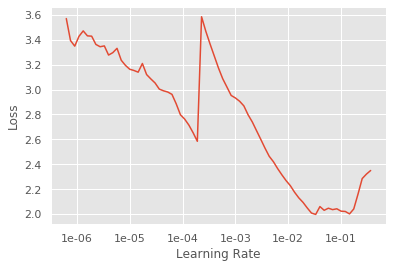

In [204]:
learn.recorder.plot()

In [221]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

In [222]:
learn.fit_one_cycle(3, 3e-4)

In [207]:
for i, v in enumerate(cat_vars):
    print(i, v)

0 volatility_bbhi
1 volatility_bbli
2 trend_psar_up_indicator
3 trend_psar_down_indicator
4 ticker
5 exchange
6 sector
7 industry
8 Year
9 Month
10 Week
11 Day
12 Dayofweek
13 Is_month_end
14 Is_month_start
15 Is_quarter_end
16 Is_quarter_start
17 Is_year_end
18 Is_year_start


In [224]:
train_df['ticker'].cat.categories
# train_df['Year'].cat.categories

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE',
       ...
       'XEL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=485)

Index(['ACCIDENT &HEALTH INSURANCE', 'ADVERTISING', 'AEROSPACE',
       'AGRICULTURAL CHEMICALS', 'AIR FREIGHT/DELIVERY SERVICES', 'APPAREL',
       'AUTO MANUFACTURING', 'AUTO PARTS:O.E.M.', 'AUTOMOTIVE AFTERMARKET',
       'BEVERAGES (PRODUCTION/DISTRIBUTION)',
       ...
       'SHOE MANUFACTURING', 'SPECIALTY CHEMICALS', 'SPECIALTY FOODS',
       'SPECIALTY INSURERS', 'STEEL/IRON ORE', 'TELECOMMUNICATIONS EQUIPMENT',
       'TELEVISION SERVICES', 'TRANSPORTATION SERVICES',
       'TRUCKING FREIGHT/COURIER SERVICES', 'WATER SUPPLY'],
      dtype='object', length=104)


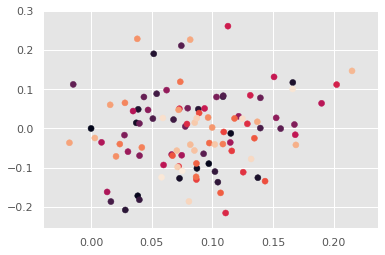

In [251]:
## Industry
emb_id = 7
emb_names = train_df['industry'].cat.categories
print(emb_names)
emb_weights = to_np(next(learn.layer_groups[0][emb_id].parameters()))
# dow_2d = TSNE(n_components=2, perplexity=50, early_exaggeration=12., learning_rate=200.).fit_transform(dow_weights)
# emb_2d = TSNE(n_components=2, metric='cosine').fit_transform(emb_weights)
emb_2d = PCA(n_components=2).fit(emb_weights.T).components_.T
plt.figure()
# plt.plot(emb2d[:, 0], emb2d[:, 1], 'ro', )
plt.scatter(emb_2d[:-1, 0], emb_2d[:-1, 1]  , c=range(len(emb_names)) )
# for p, s in zip(emb_2d, emb_names):
#     plt.annotate(s=s, xy=(p[0], p[1]))

Index(['BASIC INDUSTRIES', 'CAPITAL GOODS', 'CONSUMER DURABLES',
       'CONSUMER NON-DURABLES', 'CONSUMER SERVICES', 'ENERGY', 'FINANCE',
       'HEALTH CARE', 'MISCELLANEOUS', 'PUBLIC UTILITIES', 'TECHNOLOGY',
       'TRANSPORTATION'],
      dtype='object')


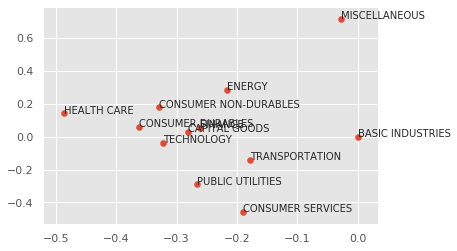

In [246]:
## Sector
emb_id = 6
emb_names = train_df['sector'].cat.categories
print(emb_names)
emb_weights = to_np(next(learn.layer_groups[0][emb_id].parameters()))
# dow_2d = TSNE(n_components=2, perplexity=50, early_exaggeration=12., learning_rate=200.).fit_transform(dow_weights)
# emb_2d = TSNE(n_components=2, metric='cosine').fit_transform(emb_weights)
emb_2d = PCA(n_components=2).fit(emb_weights.T).components_.T
plt.figure()
# plt.plot(emb2d[:, 0], emb2d[:, 1], 'ro', )
plt.scatter(emb_2d[:-1, 0], emb_2d[:-1, 1] )#, c=range(len(emb_names)) )
for p, s in zip(emb_2d, emb_names):
    plt.annotate(s=s, xy=(p[0], p[1]))

In [250]:
# learn.save('stage0')
learn.model.parameters

<bound method Module.parameters of TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(3, 3)
    (2): Embedding(3, 3)
    (3): Embedding(3, 3)
    (4): Embedding(486, 51)
    (5): Embedding(3, 3)
    (6): Embedding(13, 7)
    (7): Embedding(105, 22)
    (8): Embedding(12, 6)
    (9): Embedding(13, 7)
    (10): Embedding(54, 15)
    (11): Embedding(32, 11)
    (12): Embedding(6, 4)
    (13): Embedding(3, 3)
    (14): Embedding(3, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(2, 2)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_cont): BatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=172, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001, inplace=False)
    (4): Linear(in_features=512, out_feature

In [163]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

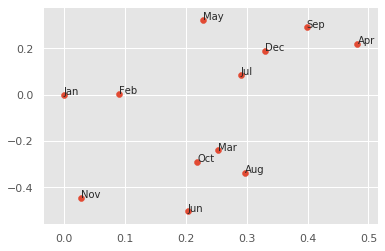

In [208]:
moy_id = 9
moy_weights = to_np(next(learn.layer_groups[0][moy_id].parameters()))
# moy_2d = TSNE(n_components=2, perplexity=50, early_exaggeration=12., learning_rate=200.).fit_transform(moy_weights)
# moy_2d.shape
# moy_2d = TSNE(n_components=2, metric='cosine').fit_transform(moy_weights)
moy_2d = PCA(n_components=2).fit(moy_weights.T).components_.T
moy_2d.shape


plt.figure()
moy_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']#, 'NA']
plt.scatter(moy_2d[:-1, 0], moy_2d[:-1, 1])#, c=range(len(moy_names)))
for p, s in zip(moy_2d, moy_names):
    plt.annotate(s=s, xy=(p[0], p[1]))

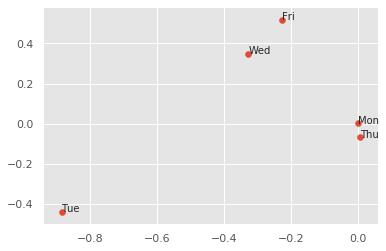

In [209]:
dow_id = 12
dow_weights = to_np(next(learn.layer_groups[0][dow_id].parameters()))
# dow_2d = TSNE(n_components=2, perplexity=50, early_exaggeration=12., learning_rate=200.).fit_transform(dow_weights)
# dow_2d = TSNE(n_components=2, metric='cosine').fit_transform(dow_temp)
dow_2d = PCA(n_components=2).fit(dow_weights.T).components_.T
plt.figure()
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
# plt.plot(emb2d[:, 0], emb2d[:, 1], 'ro', )
plt.scatter(dow_2d[:-1, 0], dow_2d[:-1, 1])#, c=range(len(dow_names)))
for p, s in zip(dow_2d, dow_names):
    plt.annotate(s=s, xy=(p[0], p[1]))

In [181]:
dow_weights

array([[-1.340371e-07,  1.733530e-07,  1.929057e-07,  6.572749e-08],
       [ 3.405704e-02, -7.474180e-03, -4.907691e-02,  6.028281e-03],
       [ 4.362940e-02, -2.782349e-02, -2.932215e-02, -8.409181e-03],
       [ 7.280673e-03, -1.492438e-02, -1.275244e-03, -1.701667e-02],
       [ 1.367250e-02,  3.981442e-03, -3.760747e-02, -4.841496e-03],
       [ 5.814901e-02, -8.967827e-03, -7.718183e-02, -2.820724e-02]], dtype=float32)